In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
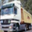

In [11]:
X_train[1]

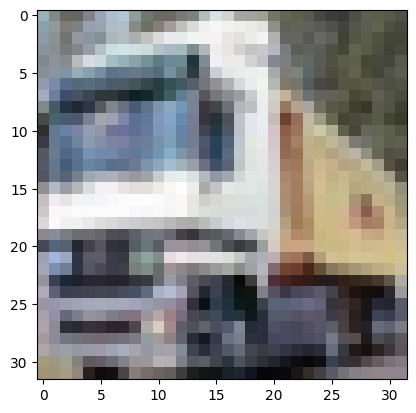

In [12]:
plt.imshow(X_train[1])

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[9]

'truck'

In [17]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index])
    plt.title(f"Label: {class_names[y[index]]}")
    plt.axis('off')
    plt.show()



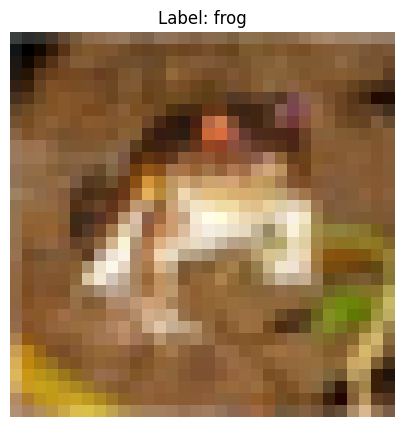

In [18]:
plot_sample(X_train, y_train, 0)

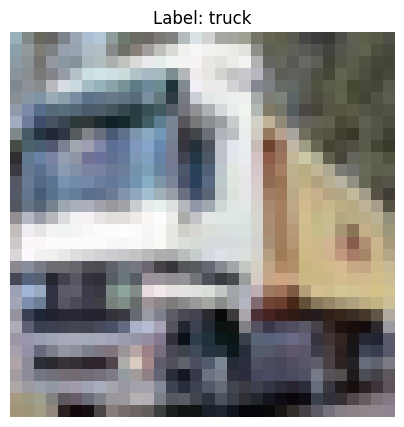

In [19]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD' ,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=15)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.3017 - loss: 1.9308
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4215 - loss: 1.6581
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4509 - loss: 1.5508
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - accuracy: 0.4738 - loss: 1.4912
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.4945 - loss: 1.4410
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5108 - loss: 1.3946
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.5239 - loss: 1.3587
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.5378 - loss: 1.3222
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.5537 - loss: 1.2767
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 81ms/step - accuracy: 0.5622 - loss: 1.2531
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 83ms/step - accuracy: 0.5721 - loss: 1.21

In [22]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.5228 - loss: 1.3435


[1.3497564792633057, 0.5228000283241272]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.73      0.56      1000
           1       0.76      0.54      0.63      1000
           2       0.35      0.55      0.43      1000
           3       0.43      0.28      0.34      1000
           4       0.49      0.43      0.46      1000
           5       0.52      0.37      0.43      1000
           6       0.58      0.57      0.58      1000
           7       0.53      0.66      0.59      1000
           8       0.71      0.57      0.63      1000
           9       0.64      0.52      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.55      0.52      0.52     10000
weighted avg       0.55      0.52      0.52     10000



In [24]:
cnn = models.Sequential([

     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
     layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn = models.Sequential([

                         #cnn
                         #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [26]:
(0.45) / (0.45+0.67)

0.40178571428571425

In [27]:
(0.67) / (0.45+0.67)

0.5982142857142857

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense

# Define model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])


In [29]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [45]:
cnn.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3536 - loss: 1.7725
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3597 - loss: 1.7725
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3519 - loss: 1.7817
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3548 - loss: 1.7742
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3544 - loss: 1.7764
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3531 - loss: 1.7761
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3577 - loss: 1.7685
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3565 - loss: 1.7696
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3548 - loss: 1.7728
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3538 - loss: 1.7717
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3594 - loss: 1.7667
Epoch 12/25
1563/1563 ━━━━

In [31]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3462 - loss: 1.8116


[1.817289113998413, 0.3402999937534332]

In [32]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

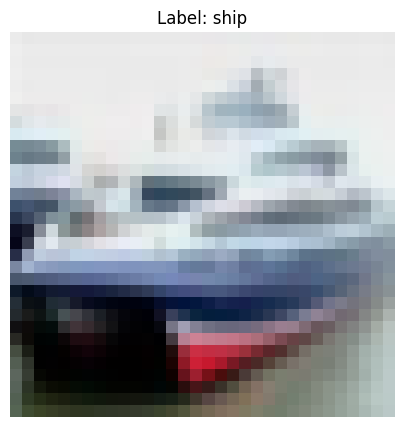

In [33]:

plot_sample(X_test, y_test, 1)

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.6443107e-01, 3.6323965e-02, 1.0000545e-01, 1.7979458e-01,
        2.8496504e-02, 2.2341120e-01, 4.2924758e-02, 8.9085503e-03,
        2.0572086e-01, 9.9830879e-03],
       [4.9166638e-02, 3.2606131e-01, 1.2849615e-03, 5.6383903e-03,
        5.0732761e-04, 3.8857081e-03, 5.6027563e-04, 2.3564065e-03,
        2.5463533e-01, 3.5590351e-01],
       [2.6167288e-01, 4.8772775e-02, 5.7723536e-03, 9.0631386e-03,
        1.2736783e-03, 1.0670843e-02, 3.5435989e-04, 3.2023096e-03,
        6.0639536e-01, 5.2822277e-02],
       [4.5294067e-01, 2.9353928e-02, 7.8660473e-02, 2.6410550e-02,
        2.8953480e-02, 3.2692347e-02, 2.9022973e-03, 4.1040346e-02,
        2.7712843e-01, 2.9917484e-02],
       [2.5557015e-02, 1.4459134e-02, 1.7546639e-01, 1.5916887e-01,
        1.6963929e-01, 1.5351851e-01, 1.9585693e-01, 8.4850028e-02,
        9.9931667e-03, 1.1490470e-02]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(5), np.int64(9), np.int64(8), np.int64(0), np.int64(6)]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [37]:
class_names = ['airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck']


In [38]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [39]:
def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index], cmap='gray')
    label_index = int(y[index])
    plt.title(f"Label: {class_names[label_index]}")
    plt.axis('off')
    plt.show()



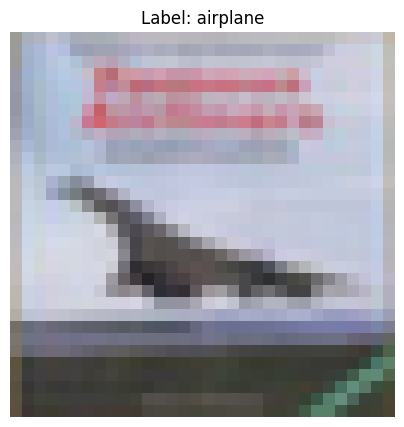

In [40]:
plot_sample(X_test, y_test, 3)

In [41]:
classes[y_classes[3]]

'airplane'

In [42]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.31      0.51      0.39      1000
           1       0.46      0.38      0.42      1000
           2       0.19      0.13      0.16      1000
           3       0.24      0.11      0.15      1000
           4       0.28      0.18      0.22      1000
           5       0.32      0.31      0.31      1000
           6       0.37      0.42      0.39      1000
           7       0.34      0.47      0.39      1000
           8       0.39      0.37      0.38      1000
           9       0.41      0.52      0.46      1000

    accuracy                           0.34     10000
   macro avg       0.33      0.34      0.33     10000
weighted avg       0.33      0.34      0.33     10000



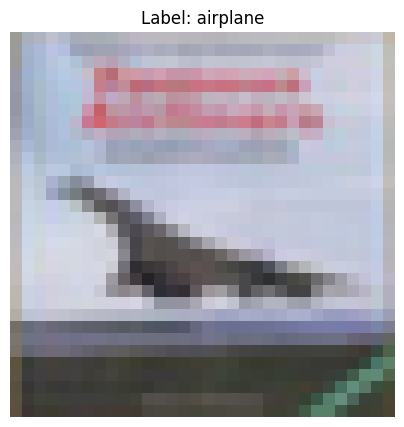

In [43]:
plot_sample(X_test, y_test, 3)